In [49]:
import pandas as pd
import json
import requests
from sqlalchemy import create_engine

In [50]:
data_file = "Resources\Youtube_dataset\CAvideos.csv"

In [51]:
# Store CSV into dataframe
youtube_data = pd.read_csv(data_file)
youtube_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [52]:
youtube_data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [53]:
# Create new data with selected columns
new_youtube_data_df = youtube_data[['title','channel_title','views','likes','dislikes','comment_count', 'category_id']].copy()
new_youtube_data_df.head()

,title,channel_title,views,likes,dislikes,comment_count,category_id
0,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,17158579,787425,43420,125882,10
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,1014651,127794,1688,13030,23
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,3191434,146035,5339,8181,23
3,I Dare You: GOING BALD!?,nigahiga,2095828,132239,1989,17518,24
4,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,33523622,1634130,21082,85067,10


In [54]:
Sorted_new_youtube_data_df = new_youtube_data_df.sort_values("views", ascending = False)
Sorted_new_youtube_data_df.reset_index()

,index,title,channel_title,views,likes,dislikes,comment_count,category_id
0,5900,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,137843120,3014479,1602383,817582,24
1,5623,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,125431369,2912715,1545018,807558,24
2,5398,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,2811217,1470387,787174,24
3,5197,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567,2656678,1353655,682890,24
4,34361,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,98938809,3037318,161813,319502,10
...,...,...,...,...,...,...,...,...
40876,579,018 Algebra Lineal 18-10-2011,udearroba,1141,0,0,0,27
40877,20505,Simon Olivier Fecteau créateur des derniers By...,mart lat,1107,14,1,3,24
40878,18076,Raptors Post-Game: DeMar DeRozan - February 13...,Toronto Raptors,1023,65,5,23,17
40879,18045,Canadian Olympian receives death threats from ...,The National,1000,46,19,0,25


In [55]:
#To check for missing data
new_youtube_data_df.count()

title            40881
channel_title    40881
views            40881
likes            40881
dislikes         40881
comment_count    40881
category_id      40881
dtype: int64

In [56]:
# Store JSON data into a Dataframe
json_file = "Resources\Youtube_dataset\CA_category_id.json"
video_category_df = pd.read_json(json_file)
video_category_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [57]:
video_category_df.dtypes


kind     object
etag     object
items    object
dtype: object

In [62]:
#How to pretty print a JSON file in Python

a = open("Resources\Youtube_dataset\CA_category_id.json")
b = json.load(a)
pretty_json = json.dumps(b,indent=4)
a.close()
print(pretty_json)

{
    "kind": "youtube#videoCategoryListResponse",
    "etag": "\"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk\"",
    "items": [
        {
            "kind": "youtube#videoCategory",
            "etag": "\"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ\"",
            "id": "1",
            "snippet": {
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
                "title": "Film & Animation",
                "assignable": true
            }
        },
        {
            "kind": "youtube#videoCategory",
            "etag": "\"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA\"",
            "id": "2",
            "snippet": {
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
                "title": "Autos & Vehicles",
                "assignable": true
            }
        },
        {
            "kind": "youtube#videoCategory",
            "etag": "\"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg\"",
            "id": "10",
 

In [75]:
#How to extract id and title from json file
print(pretty_json[id]) 

KeyError: <built-in function id>

In [81]:
 my_list = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level","National Report on Schooling (ANR) School Level","Year (Grade)"]

In [82]:
for items in my_list:
    data_file1_df[items] = data_file1_df[items].apply(lambda x: func(x))
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,ACT,Non-government,Independent,Full-time,Female,School,School,12,0.0,253.0,253.0
14139,2006,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,30.5,30.5
14140,2006,ACT,Non-government,Independent,Part-time,Male,School,School,secondary,0.0,3.2,3.2
14141,2006,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,34.2,34.2


In [83]:
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,ACT,Non-government,Independent,Full-time,Female,School,School,12,0.0,253.0,253.0
14139,2006,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,30.5,30.5
14140,2006,ACT,Non-government,Independent,Part-time,Male,School,School,secondary,0.0,3.2,3.2
14141,2006,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,34.2,34.2


In [84]:
def func(x):
    if type(x) == float:
        x = ' '
    return x.split(' ')[-1]

In [85]:
data_file1_df['State/Territory'] = data_file1_df['State/Territory'].apply(lambda x: func(x))

In [86]:
data_file1_df['State/Territory']

0        NSW
1        NSW
2        NSW
3        NSW
4        NSW
        ... 
14138    ACT
14139    ACT
14140    ACT
14141    ACT
14142    ACT
Name: State/Territory, Length: 14143, dtype: object

In [87]:
data_file1_df.describe()

,Year,FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
count,14143.000000,14143.000000,14143.00000,14143.000000
mean,2012.959202,197.264852,3680.44878,3877.713632
std,4.296281,447.751865,6268.03617,6637.495635
min,2006.000000,0.000000,0.00000,0.100000
25%,2009.000000,1.400000,25.00000,28.800000
50%,2013.000000,28.000000,708.00000,955.000000
75%,2017.000000,148.000000,5000.00000,5140.500000
max,2020.000000,3153.000000,34490.00000,37589.000000


In [88]:
data_file1_df.columns

Index(['Year', 'State/Territory', 'Affiliation (Gov/Non-gov)',
       'Affiliation (Gov/Cath/Ind)', 'FT/PT', 'Sex', 'School Level',
       'National Report on Schooling (ANR) School Level', 'Year (Grade)',
       'FTE Aboriginal and Torres Strait Islander Students ',
       'FTE Non-Indigenous Students ', 'FTE All Students '],
      dtype='object')

In [89]:
data_file1_df["State/Territory"].head()

0    NSW
1    NSW
2    NSW
3    NSW
4    NSW
Name: State/Territory, dtype: object

In [90]:
data_file1_df["State/Territory"].unique()

array(['NSW', 'Vic.', 'Qld', 'SA', 'WA', 'Tas.', 'NT', 'ACT'],
      dtype=object)

In [91]:
data_file1_df["State/Territory"].value_counts()

Vic.    2409
Qld     2124
SA      1870
NSW     1716
Tas.    1559
WA      1544
NT      1544
ACT     1377
Name: State/Territory, dtype: int64

In [92]:
df1 = data_file1_df[["Year", "State/Territory", "FTE All Students "]].head()
df1

,Year,State/Territory,FTE All Students
0,2020,NSW,36771.0
1,2020,NSW,36789.0
2,2020,NSW,37589.0
3,2020,NSW,36651.0
4,2020,NSW,36299.0


In [93]:
#Twentyfifteen_data_df = data_file1_df.loc[data_file1_df["Year"] == 2020, :]
Twentytwenty_data_df = data_file1_df[data_file1_df["Year"] == 2020]
Twentytwenty_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
922,2020,ACT,Non-government,Independent,Full-time,Female,School,School,9,13.0,516.0,529.0
923,2020,ACT,Non-government,Independent,Full-time,Female,School,School,10,6.0,478.0,484.0
924,2020,ACT,Non-government,Independent,Full-time,Female,School,School,11,4.0,413.0,417.0
925,2020,ACT,Non-government,Independent,Full-time,Female,School,School,12,7.0,377.0,384.0


In [94]:
Last_five_years_data_df = data_file1_df.loc[(data_file1_df["Year"] == 2016) |(data_file1_df["Year"] == 2017) | (data_file1_df["Year"] == 2018) | (data_file1_df["Year"] == 2019) | (data_file1_df["Year"] == 2020)]
Last_five_years_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4610,2016,ACT,Non-government,Independent,Full-time,Female,School,School,12,4.0,354.0,358.0
4611,2016,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,2.2,2.2
4612,2016,ACT,Non-government,Independent,Part-time,Male,School,School,3,0.0,2.1,2.1
4613,2016,ACT,Non-government,Independent,Part-time,Male,School,School,6,0.0,2.4,2.4


In [95]:
# data_file1_df["State/Territory"]=data_file1_df["State/Territory"].str.replace(r"\D","",regex=True)
#data_file1_df

In [96]:
type(data_file1_df["State/Territory"][0])

str

In [97]:
# data_file1_df["State/Territory"].str.split()

In [98]:
# myList = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#for column in myList:
   # str.split(" ")
#data_file1_df





In [99]:
#for index, row in data_file1_df.iterrows(): 
   # x = row["State/Territory"]
    #print(x)
   # str.split(" ")
   # data_file1_df
    

In [100]:
#myList = ["State/Territory"]
#for values in myList:
    #print(values)

In [101]:
#myList = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#myList.remove(" ")
#data_file1_df

In [102]:

#for letter in word

In [103]:
#data_file1_df["State/Territory"].apply(lambda x: str(x).split(" "))

In [104]:
#split_columns_data_file1_df = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#for column in split_columns_data_file1_df:
    #data_file1_df[column] = data_file1_df[column].str.split(" ")[1:]
#data_file1_df

In [105]:
# split_columns_data_file1_df


In [106]:
# Last_five_years_data_df = data_file1_df.loc[(data_file1_df["Year"] == 2015) |(data_file1_df["Year"] == 2016) |(data_file1_df["Year"] == 2017) | (data_file1_df["Year"] == 2018) | (data_file1_df["Year"] == "2019") | (data_file1_df["Year"] == "2020")]
# Last_five_years_data_df

In [107]:
# Group_by_state_twenty_fifteen_data = Last_five_years_data_df.groupby(['State/Territory', 'FTE All Students ']).sum()
#Group_by_state_twenty_fifteen_data

In [108]:
#
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count().head(10)
x = Group_by_last_five_years['FTE All Students '].sum()
u = x.reset_index()
u

,State/Territory,FTE All Students
0,ACT,354313.8
1,NSW,6094245.4
2,NT,204403.0
3,Qld,4115583.8
4,SA,1343161.1
5,Tas.,405733.5
6,Vic.,4851464.7
7,WA,2091911.8


In [109]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['Affiliation (Gov/Cath/Ind)'])
Group_by_last_five_years.count().head(10)
n = Group_by_last_five_years['FTE All Students '].sum()
q = n.reset_index()
w = n.sort_values()
w
q


,Affiliation (Gov/Cath/Ind),FTE All Students
0,Catholic,3846869.8
1,Government,12757741.0
2,Independent,2856206.3


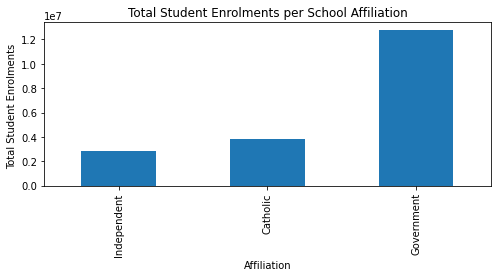

In [110]:
bar_plot = w.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments per School Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Total Student Enrolments ')
plt.show()

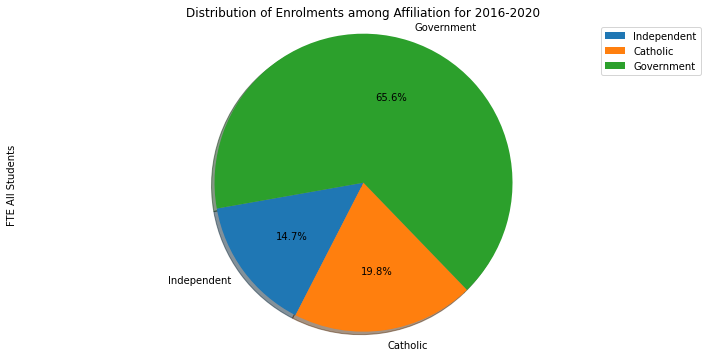

In [111]:
# Creating a pie plot
w.plot(kind="pie",y=['Affiliation (Gov/Cath/Ind)'],autopct="%1.1f%%",startangle=190,shadow=True,figsize=(10, 5))

plt.title("Distribution of Enrolments among Affiliation for 2016-2020")
plt.axis("equal")
plt.tight_layout()
plt.legend()

In [112]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count().head(10)
x = Group_by_last_five_years['FTE All Students '].sum()
u = x.reset_index()
u

,State/Territory,FTE All Students
0,ACT,354313.8
1,NSW,6094245.4
2,NT,204403.0
3,Qld,4115583.8
4,SA,1343161.1
5,Tas.,405733.5
6,Vic.,4851464.7
7,WA,2091911.8


In [113]:
#def print_percentages(u):
    #enrolment = float(u[2])
   # Sum_of_all_enrolments = enrolment.sum()
    #percent = (enrolment / Sum_of_all_enrolments) * 100
#print(percent)

In [114]:
Sum_of_all_enrolments = u["FTE All Students "].sum()
percent = u["FTE All Students "]/Sum_of_all_enrolments*100   
percent
u["Percent growth in last six years"] = percent
u

,State/Territory,FTE All Students,Percent growth in last six years
0,ACT,354313.8,1.820652
1,NSW,6094245.4,31.315465
2,NT,204403.0,1.050331
3,Qld,4115583.8,21.148052
4,SA,1343161.1,6.901874
5,Tas.,405733.5,2.084874
6,Vic.,4851464.7,24.929399
7,WA,2091911.8,10.749352


In [115]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
a = Group_by_last_five_years['FTE Aboriginal and Torres Strait Islander Students '].sum()
b = a.reset_index(["State/Territory"])
b
percentage = round(b['FTE Aboriginal and Torres Strait Islander Students ']/Sum_of_all_enrolments*100,2)
percentage
b["Percentage of indigeneous enrolment"] = percentage
b

,State/Territory,FTE Aboriginal and Torres Strait Islander Students,Percentage of indigeneous enrolment
0,ACT,10745.4,0.06
1,NSW,367193.5,1.89
2,NT,80605.0,0.41
3,Qld,335392.3,1.72
4,SA,64131.6,0.33
5,Tas.,36531.1,0.19
6,Vic.,81320.9,0.42
7,WA,137022.4,0.70


In [116]:
b.plot(kind="pie",y="State/Territory",autopct="%1.1f%%",startangle=190,shadow=True,figsize=(10, 5))
plt.title("Percentage of indegeneous enrolment for 2016-2020")
plt.axis("equal")
plt.tight_layout()
plt.legend()


TypeError: '<' not supported between instances of 'str' and 'int'

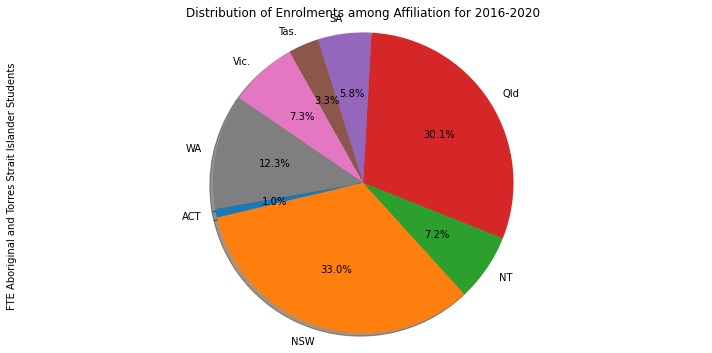

In [117]:
a.plot(kind="pie",y="State/Territory",autopct="%1.1f%%",startangle=190,shadow=True,figsize=(10, 5))
plt.title("Distribution of Enrolments among Affiliation for 2016-2020")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [118]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
c = Group_by_last_five_years['FTE Non-Indigenous Students '].sum()
d = c.reset_index()
d
percentage = round(d['FTE Non-Indigenous Students ']/Sum_of_all_enrolments*100,2)
percentage
d["Percentage of non-indigeneous enrolment"] = percentage
d

,State/Territory,FTE Non-Indigenous Students,Percentage of non-indigeneous enrolment
0,ACT,343568.4,1.77
1,NSW,5727051.9,29.43
2,NT,123797.9,0.64
3,Qld,3780191.5,19.42
4,SA,1279029.6,6.57
5,Tas.,369202.4,1.90
6,Vic.,4770143.8,24.51
7,WA,1954889.4,10.05


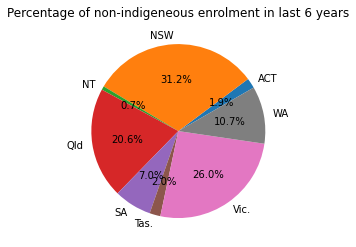

<Figure size 576x288 with 0 Axes>

In [119]:
data2 = d["Percentage of non-indigeneous enrolment"]
labels = d["State/Territory"]
explode = (0, 0.1, 0, 0.1, 0, 0, 0.1, 0)
pie_plot = data2.plot.pie(autopct="%1.1f%%", startangle=30, labels = labels, title='Percentage of non-indigeneous enrolment in last 6 years')
pie_plot.set_ylabel('')
fig = plt.figure(figsize=(8,4))

In [120]:
summary_df = pd.DataFrame({"State/Territory":labels, "Percentage of non-indigeneous enrolment": data2, "Percentage of indigeneous enrolment": data1})
summary_df
v = summary_df.set_index("State/Territory")
v



NameError: name 'data1' is not defined

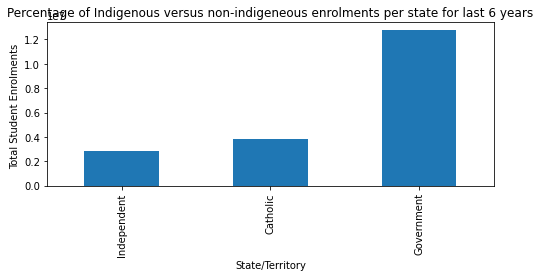

In [121]:
bar_plot = w.plot (kind = "bar", figsize=(8,3))
plt.title('Percentage of Indigenous versus non-indigeneous enrolments per state for last 6 years')
plt.xlabel('State/Territory')
plt.ylabel('Total Student Enrolments ')
plt.show()

In [122]:
# Creating a pie plot 



In [123]:
# Create a pie chart
data = w["Percent growth in last six years"]
labels = u["State/Territory"]
explode = (0, 0.1, 0, 0.1, 0, 0, 0.1, 0)
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=30, labels = labels, title='Growth Percentage in last six years')
pie_plot.set_ylabel('')
fig = plt.figure(figsize=(8,4))


KeyError: 'Percent growth in last six years'

In [124]:
#Sum_of_all_enrolments = u["FTE All Students "].sum()
#percent = x["FTE All Students "]/Sum_of_all_enrolments*100   
#percent


In [125]:
print(Sum_of_all_enrolments)
for students in u:
    u["FTE All Students "] = (u["FTE All Students "]/Sum_of_all_enrolments)*100
u

19460817.099999998


,State/Territory,FTE All Students,Percent growth in last six years
0,ACT,4.807340e-11,1.820652
1,NSW,8.268690e-10,31.315465
2,NT,2.773346e-11,1.050331
3,Qld,5.584036e-10,21.148052
4,SA,1.822405e-10,6.901874
5,Tas.,5.505004e-11,2.084874
6,Vic.,6.582482e-10,24.929399
7,WA,2.838312e-10,10.749352


In [126]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count().head(10)
x = Group_by_last_five_years['FTE All Students '].sum()
x.reset_index()
h = x.sort_values()



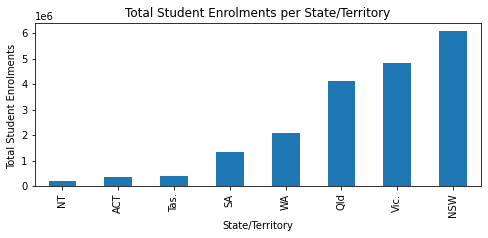

In [127]:
bar_plot = h.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Total Student Enrolments ')
plt.show()


In [128]:
#Twenty_fifteen_data = data_file1_df[data_file1_df["Year"] == 2015]
#Twenty_fifteen_data.groupby(['State/Territory'])

  

In [129]:
Twenty_sixteen_df = data_file1_df[data_file1_df["Year"] == 2018]
Twenty_sixteen_df.dropna(how="any")
Group_by_state_twenty_sixteen = Twenty_sixteen_df.groupby(["State/Territory"])
z = Group_by_state_twenty_sixteen["FTE All Students "].sum()
z.reset_index()
g = z.sort_values()

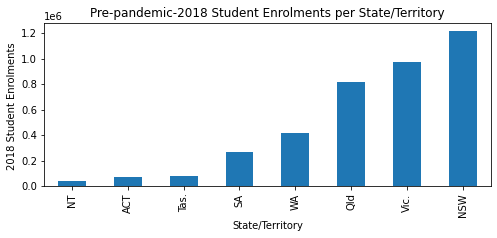

In [130]:
bar_plot = g.plot (kind = "bar", figsize=(8,3))
plt.title('Pre-pandemic-2018 Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('2018 Student Enrolments ')
plt.show()

In [131]:
NSW_df = data_file1_df[data_file1_df["State/Territory"] == 'NSW']
group_by_year_for_NSW = NSW_df.groupby(["Year"])
l = group_by_year_for_NSW["FTE All Students "].sum()
l
k = l.reset_index()
k

,Year,FTE All Students
0,2006,1110315.6
1,2007,1110457.6
2,2008,1109949.5
3,2009,1112168.8
4,2010,1120429.7
5,2011,1129749.2
6,2012,1138990.3
7,2013,1154159.0
8,2014,1168320.8
9,2015,1181605.3


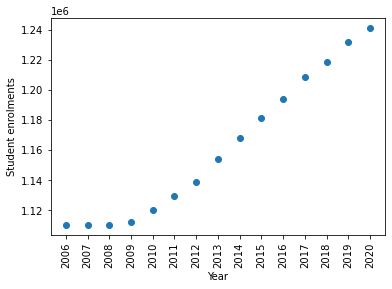

In [132]:
# linear regression for NSW data
Year = k.iloc[:,0]
Student_enrolments = k.iloc[:,1]
plt.scatter(Year,Student_enrolments)
plt.xticks(Year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Student enrolments')
plt.show()

In [141]:
# linear regression for NSW data
k_slope, k_int, k_r, k_p, k_std_err = stats.linregress(Year, Student_enrolments)
k_slope, k_int, k_r, k_p, k_std_err 

(10453.162857142825,
 -19880190.751428504,
 0.9801963199845386,
 1.5907017097971438e-10,
 585.7199917171793)

In [143]:
# line fitting for NSW data
k_fit = k_slope * Year + k_int

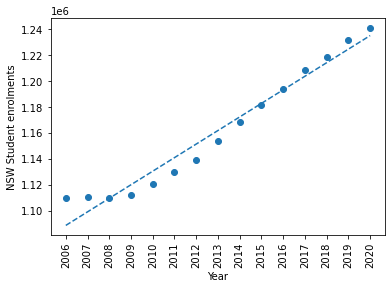

'y = 10453.16x + -19880190.75'

In [158]:
# Plot the linear model on top of scatter plot 
Year = k.iloc[:,0]
Student_enrolments = k.iloc[:,1]
plt.scatter(Year,Student_enrolments)
plt.plot(Year,k_fit,"--")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(Year, rotation=90)
plt.xlabel('Year')
plt.ylabel('NSW Student enrolments')
plt.show()
line_eq

In [136]:
# Forecasting for 2030 for NSW student enrolments
Year = 2030
print(f"The student enrolments in 2030 for NSW will be {round(k_slope * Year + k_int,2)}.")

The student enrolments in 2030 for NSW will be 1339729.85.


The r-squared is: 0.960784825711232


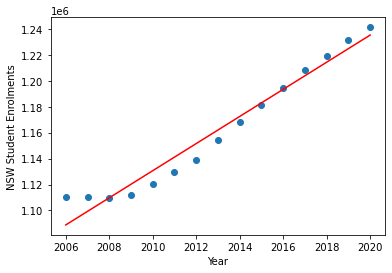

In [153]:
x_values = k.iloc[:,0]
y_values = k.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Year')
plt.ylabel('NSW Student Enrolments')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.960784825711232


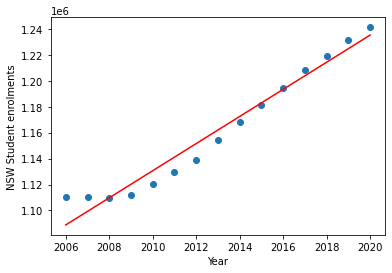

In [157]:
#x_values = k['Year']
y_values = k['FTE All Students ']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Year')
plt.ylabel('NSW Student enrolments')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [177]:
Tas_df = data_file1_df[data_file1_df["State/Territory"] == 'Tas.']
group_by_year_for_Tas = Tas_df.groupby(["Year"])
g = group_by_year_for_Tas["FTE All Students "].sum()
g
h = g.reset_index()
h

,Year,FTE All Students
0,2006,83435.7
1,2007,82811.7
2,2008,82465.9
3,2009,82092.7
4,2010,82051.6
5,2011,82157.2
6,2012,81381.1
7,2013,80405.9
8,2014,80700.7
9,2015,80606.4


The r-squared is: 0.4904618341953918


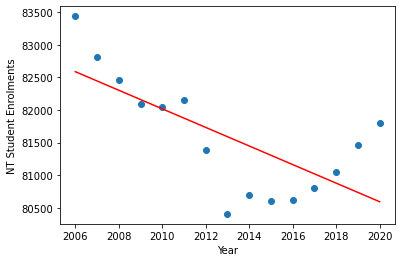

'y = -142.38x + 368205.47'

In [178]:
# Linear regression for Tasmania
x_values = h.iloc[:,0]
y_values = h.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(j_values,regress_values,"r-")
plt.xlabel('Year')
plt.ylabel('NT Student Enrolments')
print(f"The r-squared is: {rvalue**2}")
plt.show()
line_eq

In [179]:
k_slope, k_int, k_r, k_p, k_std_err = stats.linregress(x_values, y_values)
k_slope, k_int, k_r, k_p, k_std_err 

(-142.38249999999985,
 368205.46583333303,
 -0.7003298038748542,
 0.0036431919817131973,
 40.2504452353483)

In [180]:
k_fit = k_slope * Year + k_int

In [182]:
Year = 2030
print(f"The student enrolments in 2030 for Tas will be {round(k_slope * Year + k_int,2)}.")

The student enrolments in 2030 for Tas will be 79168.99.


In [ ]:
#Line plot
line_plot = k.plot.line(x = "Year" , y = "FTE All Students ") 
line_plot



In [ ]:
#scatter plot for NSW state
k.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'red')
plt.show()
correlation = st.pearsonr('Year','FTE All Students ')
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
k.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'red')
plt.show()
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x,y)
vc_fit = vc_slope * x + vc_int

In [ ]:
FTE_Non_Indigenous_Students = data_file1_df.iloc[:,9]
FTE_Aboriginal_Students = data_file1_df.iloc[:,10]
correlation = st.pearsonr(FTE_Non_Indigenous_Students, FTE_Aboriginal_Students)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
len(y)
print(len(y))

In [ ]:
NT_df = data_file1_df[data_file1_df["State/Territory"] == 'NT']
group_by_year_for_NT = NT_df.groupby(["Year"])
j = group_by_year_for_NT["FTE All Students "].sum()
j
o = j.reset_index()
o

In [ ]:
#scatter plot NT
o.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'blue')
plt.show()

In [ ]:
Tas_df = data_file1_df[data_file1_df["State/Territory"] == 'Tas.']
group_by_year_for_Tas = Tas_df.groupby(["Year"])
p = group_by_year_for_Tas["FTE All Students "].sum()
p
q = p.reset_index()
q
z = q.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'green')
plt.show()
#plt.savefig('Tasmania trend for student enrolments.png')

In [ ]:
Twenty_twenty_df = data_file1_df[data_file1_df["Year"] == 2020]
Twenty_twenty_df.dropna(how="any")
Group_by_state_twenty_twenty = Twenty_twenty_df.groupby(["State/Territory"])
i = Group_by_state_twenty_twenty["FTE All Students "].sum()
i.reset_index()
j = i.sort_values()

In [ ]:
bar_plot = j.plot (kind = "bar", figsize=(8,3))
plt.title(' Post-pandemic - 2020 Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('2020 Student Enrolments ')
plt.show()

In [ ]:
#Group_by_state_twenty_fifteen = Twenty_fifteen_df.groupby(['State/Territory'])
#z = Group_by_state_twenty_fifteen['FTE All Students '].sum()


In [ ]:
#z = Group_by_state_twenty_fifteen['FTE All Students '].sum()

In [ ]:
#Student_enrolments = Group_by_last_five_years["FTE All Students "].sum()
#plt.bar(Student_enrolments["State/Territory", "FTE All Students "])
#plt.title('Total Student Enrolments per State/Territory')
#plt.xlabel('State/Territory')
#plt.ylabel('FTE All Students ')
#plt.show()

In [ ]:
# Create a bar graph
#import matplotlib.pyplot as plt
Student_enrolments = pd.DataFrame({State/Territory: })
plt.bar("State/Territory", "FTE All Students ")
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('FTE All Students ')
plt.show()
--
   
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP_Per_Capita': [45000,42000,52000,49000,47000]
       }
df = pd.DataFrame(Data,columns=['Country','GDP_Per_Capita'])

New_Colors = ['green','blue','purple','brown','teal']
plt.bar(df['Country'], df['GDP_Per_Capita'], color=New_Colors)
plt.title('Country Vs GDP Per Capita', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP Per Capita', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# def remove_prefix(str, prefix):
    if str.startswith(a):
        return str[len(prefix):]
    return str
for x in data_file1_df.columns:
    x.remove_prefix()

In [ ]:
fish = "Peace"
letters = []
for letter in fish:
    letters.append(letter)
    print(letters)